In [24]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

In [25]:
np.random.seed(42)

In [26]:
def generate_ancestors(t=10, sigma=20):
    ancestors = []
    time = 0
    while time <= t:
        x = np.random.exponential(1/sigma)
        ancestors.append(time)
        time += x


    return ancestors

In [27]:
def h(n, _lambda=0.1, _type='uni'):
    if _type == 'uni':
        return np.random.uniform(0, 20, size=n)  # uniform [0, 20]
    if _type == 'exp':
        # return stats.expon.rvs(scale=1/_lambda, size=n)  # lambda*exp{-lambda*t}
        return np.random.exponential(1/_lambda, size=n)

In [28]:
def generate_taus(n, t, _lambda=0.1, _type='uni'):
    taus = []
    for i in range(n):
        taus.append(h(t, _lambda=_lambda, _type=_type))

    return taus

In [29]:
def rho(deaths):
    x = deaths

    rho = math.log(1+0.1*x) / 4
    if rho == 0:
        rho = 1
    return rho

In [30]:
class Simulator:
    def __init__(self, n_runs, n_gen, h_type='uni'):
        self.n_runs = n_runs
        self.n_gen = n_gen

        self.m = 2
        self.h_type = h_type
        self.death_prob = 0.02

    def run_experiment(self, _type):
        ancestors = generate_ancestors()
        l = [ancestors]
        deaths = []
        infected = []

        d = dict()
        for i in range(self.n_gen):
            d[i] = 0

        for i in range(self.n_gen):
            print(f"gen: {i}, nodes: {len(l[i])}")
            death = np.random.random(size=len(l[i]))
            death = death[death < self.death_prob]
            deaths.append(len(death))
            for _d in death:
                d[math.floor(_d)] += 1

            nodes_i = []
            for parents_time in l[i]:
                infected.append(parents_time)

                r = 1
                if parents_time >= 20:
                    # r = rho(0, np.sum(deaths), len(l[i]))
                    r = rho(d[math.floor(parents_time)])

                # n = stats.poisson.rvs(self.m * r)  # generate children
                n = stats.poisson.rvs(self.m / r)

                # taus = generate_taus(n, parents_time, _type=_type)
                taus = h(n, _type=_type)
                t_w = np.array(taus) + parents_time

                # not add childs above time threshold
                # t_w = t_w[t_w < self.n_gen]

                nodes_i.extend(t_w[t_w < self.n_gen])

            l.append(nodes_i)
            if len(nodes_i) == 0:  # exit if process is extinct
                break


        return l, infected, deaths, d

    def plot(self):
        pass

    def simulate(self, n_runs=1):

        res_uni = self.run_experiment(_type='uni')
        res_exp = self.run_experiment(_type='exp')

        return res_uni, res_exp

In [31]:
s = Simulator(1, 100)

In [9]:
res_uni, res_exp = s.simulate()

gen: 0, nodes: 217
gen: 1, nodes: 418
gen: 2, nodes: 854
gen: 3, nodes: 1709
gen: 4, nodes: 3498
gen: 5, nodes: 6971
gen: 6, nodes: 14052
gen: 7, nodes: 26875
gen: 8, nodes: 46287
gen: 9, nodes: 69704
gen: 10, nodes: 90784
gen: 11, nodes: 102327
gen: 12, nodes: 100917
gen: 13, nodes: 88972
gen: 14, nodes: 70781
gen: 15, nodes: 50791
gen: 16, nodes: 33559
gen: 17, nodes: 20293
gen: 18, nodes: 11319
gen: 19, nodes: 5785
gen: 20, nodes: 2815
gen: 21, nodes: 1289
gen: 22, nodes: 576
gen: 23, nodes: 258
gen: 24, nodes: 119
gen: 25, nodes: 37
gen: 26, nodes: 12
gen: 27, nodes: 3
gen: 0, nodes: 212
gen: 1, nodes: 418
gen: 2, nodes: 854
gen: 3, nodes: 1676
gen: 4, nodes: 3316
gen: 5, nodes: 6559
gen: 6, nodes: 12360
gen: 7, nodes: 22555
gen: 8, nodes: 39177
gen: 9, nodes: 65917
gen: 10, nodes: 104753
gen: 11, nodes: 156479
gen: 12, nodes: 220112
gen: 13, nodes: 291247
gen: 14, nodes: 363929
gen: 15, nodes: 429476
gen: 16, nodes: 481452
gen: 17, nodes: 512795
gen: 18, nodes: 518507
gen: 19, nod

In [10]:
print(len(res_uni[0]))
print(len(res_exp[0]))

29
47


In [11]:
print(np.sum(res_uni[2]))
print(np.sum(res_exp[2]))

15226
117617


In [12]:
print(len(res_uni[1]))
print(len(res_exp[1]))

751222
5894394


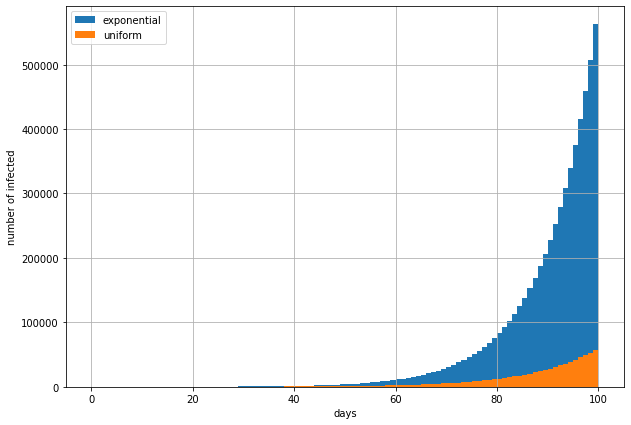

In [13]:
plt.figure(figsize=(10,7))

plt.hist(res_exp[1], bins=100, label='exponential')
plt.hist(res_uni[1], bins=100, label='uniform')

plt.xlabel("days", fontsize=14)
plt.ylabel("number of infected", fontsize=14)
plt.grid()
plt.legend()
# plt.savefig("infected_hist.png")
plt.show()

In [14]:
l_u, arr2_u = np.histogram(res_uni[1], bins=100)
arr1_u = [0]
arr1_u.extend(l_u)

l_e, arr2_e = np.histogram(res_exp[1], bins=100)
arr1_e = [0]
arr1_e.extend(l_e)

In [15]:
l_u, arr4_u = np.histogram(res_uni[1], bins=100)
arr3_u = [0]
arr3_u.extend(l_u)

l_e, arr4_e = np.histogram(res_exp[1], bins=100)
arr3_e = [0]
arr3_e.extend(l_e)

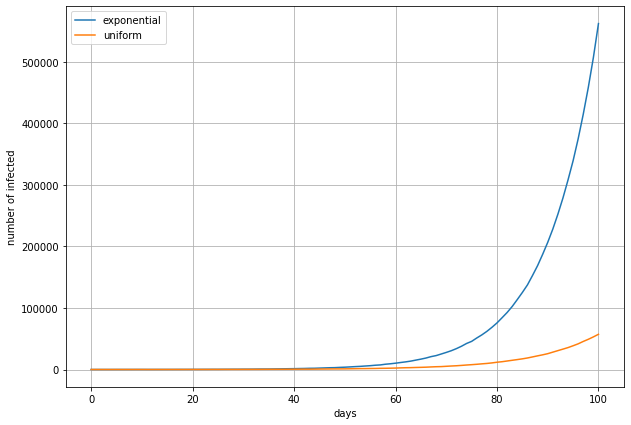

In [16]:
plt.figure(figsize=(10,7))

plt.plot(arr2_e, arr1_e, label="exponential")
plt.plot(arr2_u, arr1_u, label="uniform")


plt.legend()
plt.grid()
plt.xlabel("days", fontsize=14)
plt.ylabel("number of infected", fontsize=14)
# plt.savefig("infected_plot.png")
plt.show()

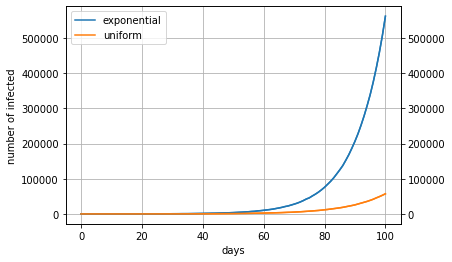

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(arr2_e, arr1_e, label="exponential")
ax1.plot(arr2_u, arr1_u, label="uniform")
plt.plot(arr4_e, arr3_e)
plt.plot(arr4_u, arr3_u)

ax1.legend()
ax1.grid()
ax1.set_xlabel("days")
ax1.set_ylabel("number of infected")
# plt.savefig("infected_plot.png")

plt.show()

In [ ]:
plt.plot(res_uni[3])
plt.plot(res_exp[3])

In [ ]:
res_uni[3]

In [19]:
def rho(deaths):
    if deaths < 50:
        rho = 1
    if 50 <= deaths < 75:
        rho = 1.5
    else:
        rho = 2

    return rho

In [20]:
l = []
l1 = []
for i in res_exp[2]:
    l.append(rho(i))
    l1.append(rho(i)**2)

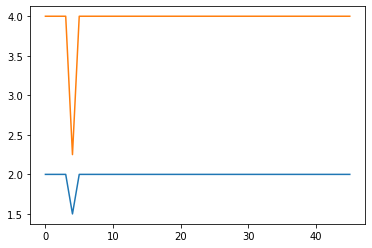

In [21]:
plt.plot(l)
plt.plot(l1)

In [22]:
# 659000 infected

In [23]:
# per simulazione seconda parte cercare di tenere lambda fisso quando raggiunge un certo valore (rho = 2)
# mantenere rt = 1